<h3>Simulación matemática 2018 </h3>
<div style="background-color:#0099cc;"> 
    <font color = white>
<ul>
  <li>Lázaro Alonso </li>
  <li>Email:   `alonsosilva@iteso.mx, lazarus.alon@gmail.com`</li>
</ul>
    </font>
</div>

### Por favor, den click al siguiente link. Será una forma fácil de que me hagan llegar sus dudas, además de que todos podremos estar al tanto de los problemas tanto de tarea como de clase. 

https://join.slack.com/t/sm-grupo/shared_invite/enQtMzcxMzcxMjY1NzgyLWE5ZDlhYjg4OGJhMGE2ZmY2ZGUzZWIxYzQzOTUxZWU2ZGM5YjUyYWMyZGUzNzZjMDE5ZDIxYTA4YTI2ZWQ1NTU

### Máximos y mínimos

##### 1. Encuentre los valores máximo y mínimo locales de la función 
$$g(x) = x + 2 \sin x$$

Elementos que debe de contener su respuesta: 
   - Gráfica de la funcion $g(x)$
   - Gráfica de la primera y segunda derivada, ($g(x)'$, $g(x)''$)
   - Indicar en la gráfica los máximos y mínimos (_utilizar plt.scatter_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
sym.init_printing(use_latex='mathjax')
sym.var("x")
sym.var("x", real = True)
g = x + 2*sym.sin(x)
dg = sym.diff(g,x,1)
d2g = sym.diff(g,x,2)

In [2]:

x1c = sym.solve(dg, x)
x2c = sym.solve(d2g, x)
print("Valores de g´(x)=0 --> ")
print(x1c)
print("Valores de g´´(x)=0 --> ")
print(x2c)

Valores de g´(x)=0 --> 
[2*pi/3, 4*pi/3]
Valores de g´´(x)=0 --> 
[0, pi]


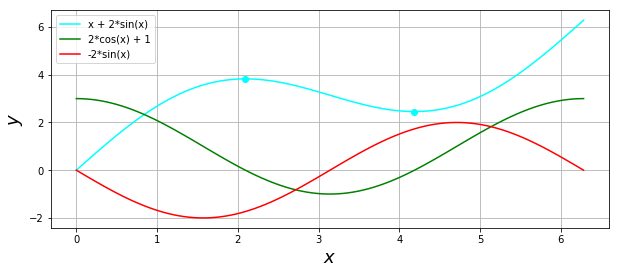

In [3]:
g_num = sym.lambdify([x], g, 'numpy')
dg_num = sym.lambdify([x], dg, 'numpy')
d2g_num = sym.lambdify([x], d2g, 'numpy')
x_vec = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(10,4))
plt.plot(x_vec, g_num(x_vec), color = "cyan", label = g)
plt.plot(x_vec, dg_num(x_vec), color = "green", label = dg)
plt.plot(x_vec, d2g_num(x_vec), color = "red", label = d2g)
plt.scatter(2*np.pi/3,(2*np.pi/3) + 2*np.sin(2*np.pi/3), color="cyan")
plt.scatter(4*np.pi/3,(4*np.pi/3) + 2*np.sin(4*np.pi/3), color="cyan")
plt.grid()
plt.legend()
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.show()

##### 2. Discuta la curva $f(x) = x^4 - 4x^3$. Puntos de inflexión, máximos y mínimos. Su respuesta debe de incluir los mismos puntos que el caso anterior. 

In [4]:
sym.var("z")
sym.var("z", real = True)
f=z**4-4*z**3
df = sym.diff(f,z,1)
d2f = sym.diff(f,z,2)
z1c = sym.solve(df, z)
z2c = sym.solve(d2f, z)
print("Valores de f´(z)=0 --> ")
print(z1c)
print("Valores de f´´(z)=0 --> ")
print(z2c)

Valores de f´(z)=0 --> 
[0, 3]
Valores de f´´(z)=0 --> 
[0, 2]


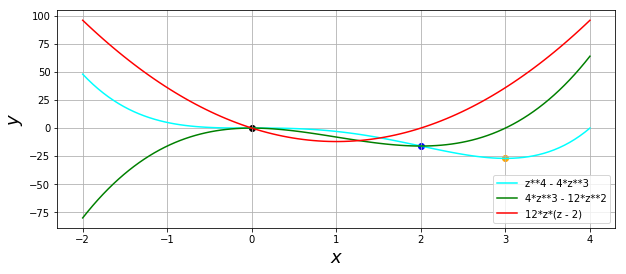

In [5]:
f_num = sym.lambdify([z], f, 'numpy')
df_num = sym.lambdify([z], df, 'numpy')
d2f_num = sym.lambdify([z], d2f, 'numpy')
x_vec = np.linspace(-2, 4, 100)

plt.figure(figsize=(10,4))
plt.plot(x_vec, f_num(x_vec), color = "cyan", label = f)
plt.plot(x_vec, df_num(x_vec), color = "green", label = df)
plt.plot(x_vec, d2f_num(x_vec), color = "red", label = d2f)
plt.scatter(0,0, color="black")
plt.scatter(3,3**4-4*3**3, color="orange")
plt.scatter(2,2**4-4*2**3, color="blue")
plt.grid()
plt.legend()
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.show()

##### 3. Se va a fabricar una lata que ha de contaner 1L de aceite. Encuentre las dimensiones que debe de tener la lata de manera que minimicen el costo del metal para fabricarla. 

- La solución debe de incluir los siguientes elementos 
    - Ecuación del sistema
    - Números críticos
    - Dibujar la lata

In [62]:
sym.var("w")
sym.var("w", real = True)

#1000cm3=1lt=h*pi*r**2
h = 1000/(np.pi*(w**2))
area = 2*np.pi*w**2 +h*2*np.pi*w 
derarea = sym.diff(area,w,1)
print("Derivada de area: ")
print(derarea)
w1c = sym.solve(derarea, w)
print("Valores de area´(w)=0 --> ")
print(w1c)

10.838764212436917
Derivada de area: 
12.5663706143592*w - 2000.0/w**2
Valores de area´(w)=0 --> 
[5.41926070139289]


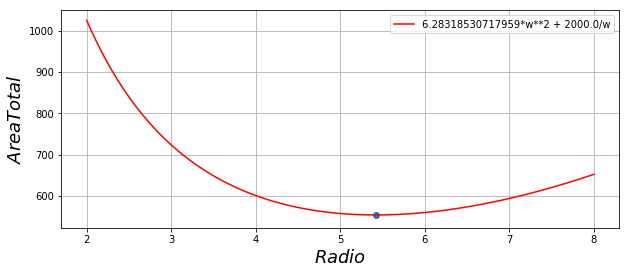

In [60]:

area_num = sym.lambdify([w], area, 'numpy')
derarea_num = sym.lambdify([w], derarea, 'numpy')
x_vec = np.linspace(2, 8, 100)
punto= (2*np.pi*5.4192**2) + (1000/(np.pi*(5.4192**2)))*2*np.pi*5.4192 
plt.figure(figsize=(10,4))
plt.plot(x_vec, area_num(x_vec), color = "red", label = area)
plt.grid()
plt.scatter(5.4192,punto)
plt.legend()
plt.xlabel('$Radio$', fontsize = 18)
plt.ylabel('$Area Total$', fontsize = 18)
plt.show()

Para saber como minimizar el costo al hacer una lata, necesitamos encontrar una formula la cual nos diga cuanto metal usaremos, en este caso, necesitaremos el area de las tapas y el cilindro, por lo que podemos decir que:

$Area$ $total = 2π(r^2) + 2000/r$

Entonces, ahora que conocemos la funcion del area, necesitamos saber el punto donde el area es minima, manteniendo el volumen de 1 litro, con el teorema de Fermat, nos da que para optimizar y reducir los costos, el radio tendra que ser de 5.4192 cm y la altura de 10.8387 cm.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://wchaverri.files.wordpress.com/2010/04/lata.jpg" width="300px" height="100px" />